In [2]:
import pandas as pd

# Load the dataset
netflix_data = pd.read_csv('Netflix.csv')

# Display the first few rows of the dataset to understand its structure
netflix_data.head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,14-Aug-20,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,23-Dec-16,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,20-Dec-18,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,16-Nov-17,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,1-Jan-20,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [3]:
netflix_data.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

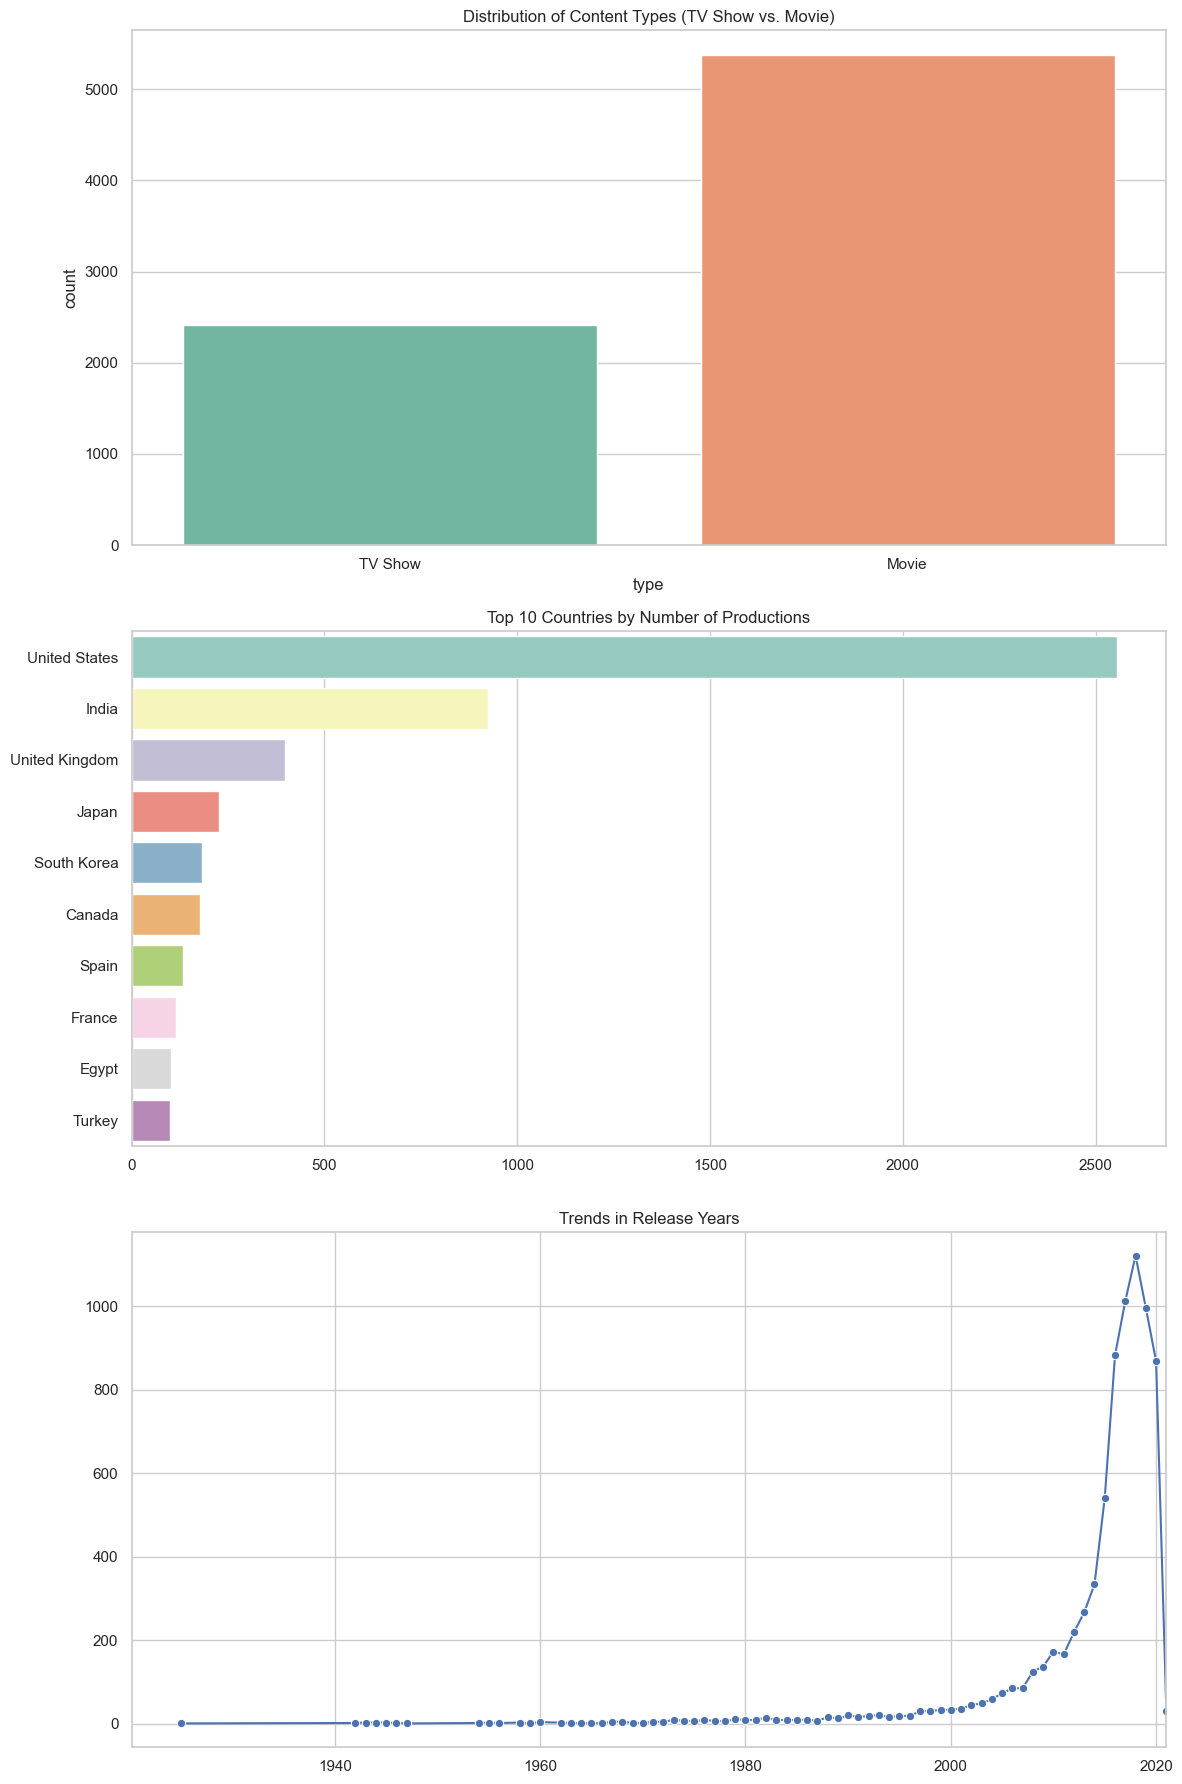

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting up visual styles for the plots
sns.set(style="whitegrid")

# Create a figure for multiple plots
fig, ax = plt.subplots(3, 1, figsize=(12, 18))

# Plot 1: Distribution of Types (TV Show vs. Movie)
sns.countplot(x='type', data=netflix_data, palette="Set2", ax=ax[0])
ax[0].set_title('Distribution of Content Types (TV Show vs. Movie)')

# Plot 2: Top 10 Countries by Number of Productions
top_countries = netflix_data['country'].value_counts().head(10)
sns.barplot(y=top_countries.index, x=top_countries.values, palette="Set3", ax=ax[1])
ax[1].set_title('Top 10 Countries by Number of Productions')

# Plot 3: Release Year Trends
release_years = netflix_data['release_year'].value_counts().sort_index()
sns.lineplot(x=release_years.index, y=release_years.values, ax=ax[2], marker='o')
ax[2].set_title('Trends in Release Years')
ax[2].set_xlim(right=netflix_data['release_year'].max())

plt.tight_layout()
plt.show()


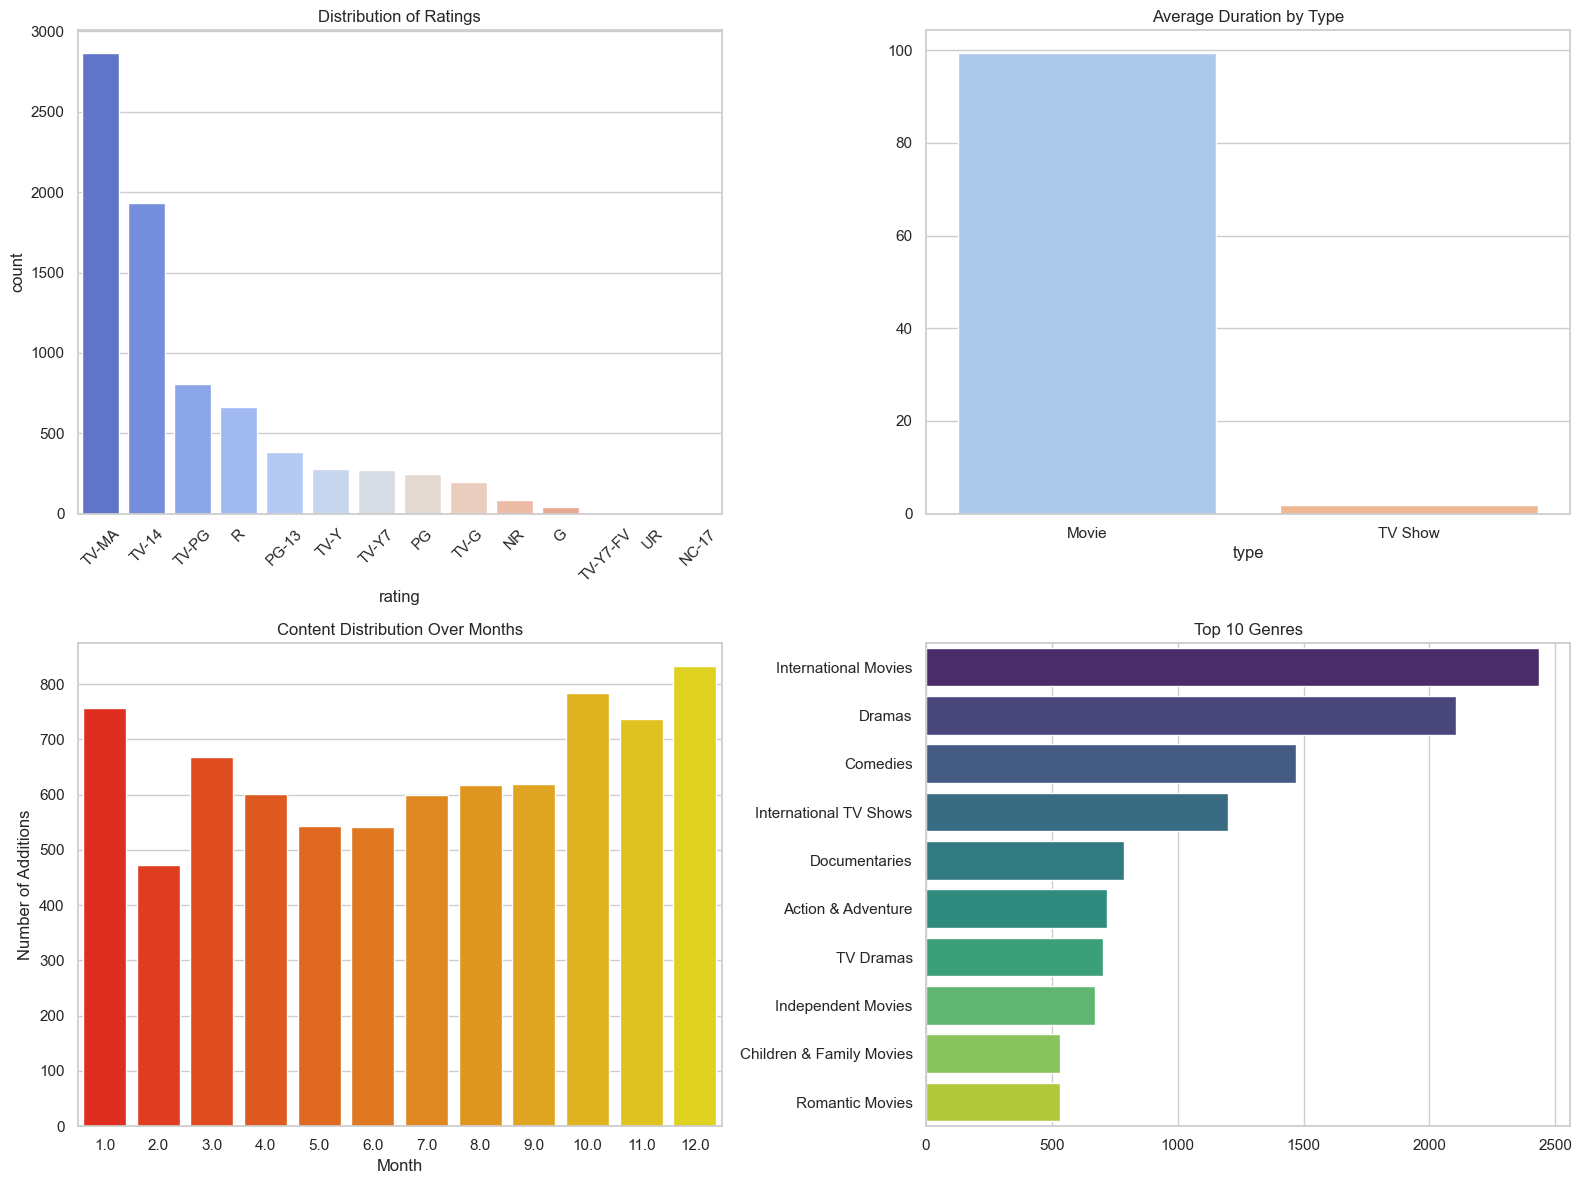

In [3]:
# Convert date_added to datetime format and extract the month
netflix_data['date_added'] = pd.to_datetime(netflix_data['date_added'], errors='coerce')
netflix_data['month_added'] = netflix_data['date_added'].dt.month

# Setting up the plots
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Plot 1: Distribution of Ratings
sns.countplot(x='rating', data=netflix_data, palette="coolwarm", ax=axes[0, 0], order=netflix_data['rating'].value_counts().index)
axes[0, 0].set_title('Distribution of Ratings')
axes[0, 0].tick_params(axis='x', rotation=45)

# Plot 2: Average Duration by Type
# Cleaning duration column to separate numbers
netflix_data['duration_num'] = netflix_data['duration'].str.extract('(\d+)').astype(float)
netflix_data['duration_unit'] = netflix_data['duration'].str.extract('([a-zA-Z]+)')
avg_duration = netflix_data.groupby('type')['duration_num'].mean()
sns.barplot(x=avg_duration.index, y=avg_duration.values, palette="pastel", ax=axes[0, 1])
axes[0, 1].set_title('Average Duration by Type')

# Plot 3: Content Distribution Over Months
month_counts = netflix_data['month_added'].value_counts().sort_index()
sns.barplot(x=month_counts.index, y=month_counts.values, palette="autumn", ax=axes[1, 0])
axes[1, 0].set_title('Content Distribution Over Months')
axes[1, 0].set_xlabel('Month')
axes[1, 0].set_ylabel('Number of Additions')

# Plot 4: Genre Popularity
from itertools import chain
genre_counts = pd.Series(list(chain.from_iterable([x.split(', ') for x in netflix_data['listed_in'].dropna()]))).value_counts().head(10)
sns.barplot(y=genre_counts.index, x=genre_counts.values, palette="viridis", ax=axes[1, 1])
axes[1, 1].set_title('Top 10 Genres')

plt.tight_layout()
plt.show()


In [4]:
pip install textblob


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 626.3/626.3 kB 3.5 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 5.0 MB/s eta 0:00:0000:0100:01m
  Attempting uninstall: nltk
    Found existing installation: nltk 3.7
    Uninstalling nltk-3.7:
      Successfully uninstalled nltk-3.7
Note: you may need to restart the kernel to use updated packages.


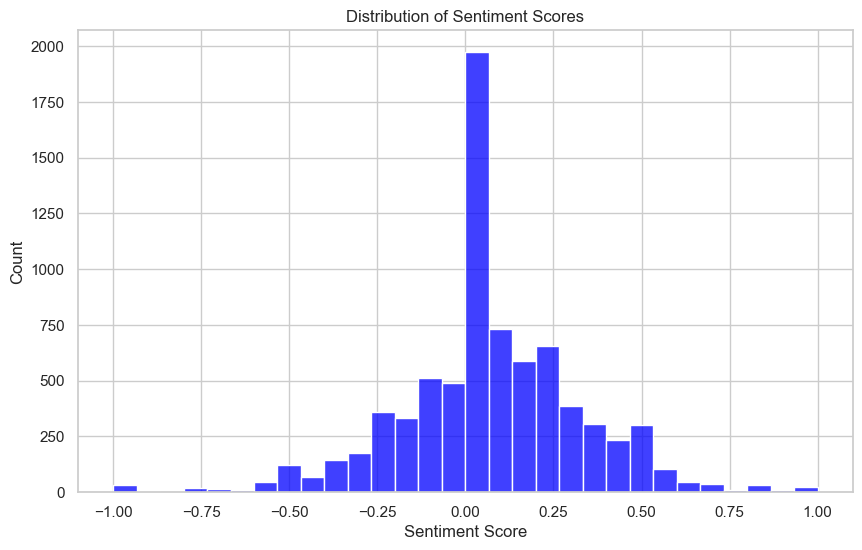

In [5]:
from textblob import TextBlob

# Preprocessing text: Lowercasing and removing any potential HTML tags or artifacts
netflix_data['clean_description'] = netflix_data['description'].str.lower()
netflix_data['clean_description'] = netflix_data['clean_description'].str.replace('<[^<]+?>', '', regex=True)

# Performing sentiment analysis using TextBlob
netflix_data['sentiment'] = netflix_data['clean_description'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Visualize the distribution of sentiment scores
plt.figure(figsize=(10, 6))
sns.histplot(netflix_data['sentiment'], bins=30, kde=False, color='blue')
plt.title('Distribution of Sentiment Scores')
plt.xlabel('Sentiment Score')
plt.ylabel('Count')
plt.show()

In [6]:
pip install wordcloud


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 173.2/173.2 kB 1.8 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


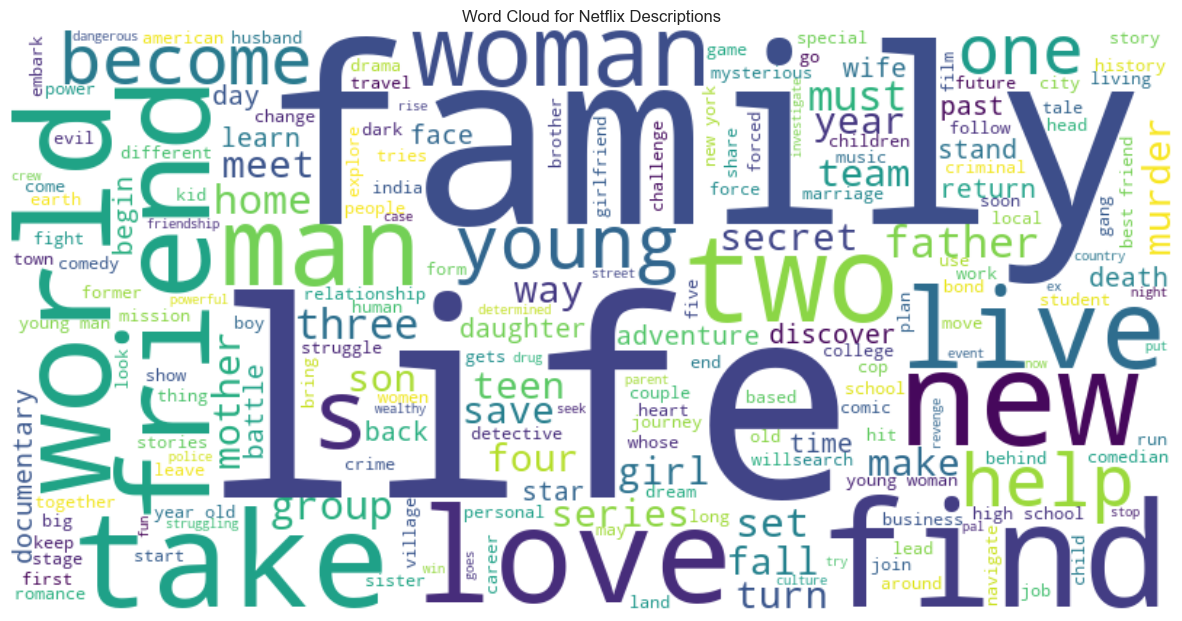

In [7]:

from wordcloud import WordCloud

# Generating a word cloud from the cleaned descriptions
text = ' '.join(netflix_data['clean_description'].dropna())  # Combining all descriptions into one large text string
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the word cloud
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off the axis
plt.title('Word Cloud for Netflix Descriptions')
plt.show()


In [30]:
pip install pytrends

Note: you may need to restart the kernel to use updated packages.


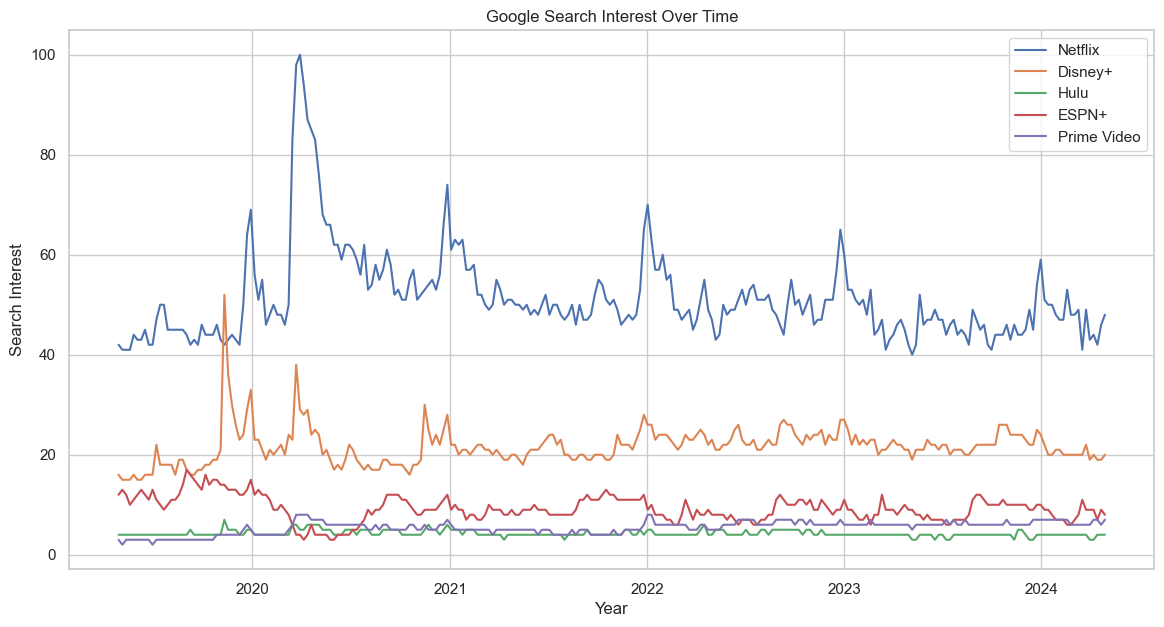

In [31]:
from pytrends.request import TrendReq
import pandas as pd
import matplotlib.pyplot as plt

# Initialize a PyTrends request
pytrends = TrendReq(hl='en-US', tz=360)

# Define the search terms
kw_list = ["Netflix", "Disney+", "Hulu", "ESPN+", "Prime Video"]

# Build the payload to fetch data
pytrends.build_payload(kw_list, cat=0, timeframe='today 5-y', geo='', gprop='')

# Get interest over time: returns historical, indexed data for when the keyword was searched most as shown on Google Trends
interest_over_time_df = pytrends.interest_over_time()

# Check if the DataFrame is empty
if not interest_over_time_df.empty:
    # Drop the 'isPartial' column
    interest_over_time_df = interest_over_time_df.drop(labels=['isPartial'], axis='columns')
    
    # Plot the trends of each streaming service
    plt.figure(figsize=(14, 7))
    for column in interest_over_time_df.columns:
        plt.plot(interest_over_time_df.index, interest_over_time_df[column], label=column)

    plt.title('Google Search Interest Over Time')
    plt.xlabel('Year')
    plt.ylabel('Search Interest')
    plt.legend()
    plt.grid(True)
    plt.show()
else:
    print("No data available for the specified terms and timeframe.")